<a href="https://colab.research.google.com/github/FelixEbenezer/TER/blob/main/ter_demo_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import re
import pandas as pd
from bs4 import BeautifulSoup
import random
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset_immersion.csv', sep='\t', header=0)

In [ ]:
df.head(5)

,text,clean_text,label,length
0,"Allez, on remet ça !\n\nLONGUE VIE A CE TOPIC",Allez on remet ça LONGUE VIE A CE TOPIC,ados,9
1,oui,oui,ados,1
2,c'est un nouveau départ pour le forum,c'est un nouveau départ pour le forum,ados,7
3,On prend les mêmes et on recommence,On prend les mêmes et on recommence,ados,7
4,"y'avait pas une majuscule à ""nuit"" ?",y'avait pas une majuscule à `` nuit '',ados,8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


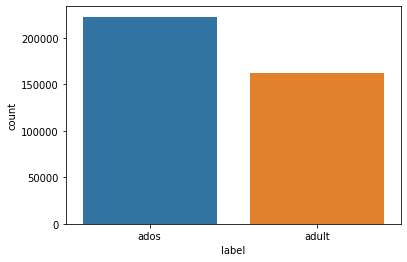

In [ ]:
sns.countplot(df['label'])

In [ ]:
df = df.drop(['clean_text', 'length'], axis=1)

In [ ]:
df.head(5)

,text,label
0,"Allez, on remet ça !\n\nLONGUE VIE A CE TOPIC",ados
1,oui,ados
2,c'est un nouveau départ pour le forum,ados
3,On prend les mêmes et on recommence,ados
4,"y'avait pas une majuscule à ""nuit"" ?",ados


In [ ]:
df_ados = df[df['label']=='ados'] #Retourne toutes les lignes ados

In [ ]:
#Recuperer aleatoirement 100000 lignes ados
df_ados_100 = df_ados.sample(5000)

In [ ]:
df1 = df[df['label']=='ados'][0:100] #Retourne aussi les 100 premieres lignes ados mais pas aleatoirement 

In [ ]:
df_ados_100.shape

(5000, 2)

In [ ]:
df_ados_100.head(5)

,text,label
65481,"Oui c'est pas mal mais bon, t'es pas le seul t...",ados
142938,"Mince, moi aussi elle est presque complètement...",ados
93084,Salut! Oublie le rasoir trop dangereux et la c...,ados
15475,"En réponse à Sku19fae\nJe le dirai quand toi,t...",ados
189020,"Alors t'appuies sur select, tu fais haut bas g...",ados


In [ ]:
df_ados_100.tail(5)

,text,label
116644,"Bah non ma bite fais vraiment 17 cm, je vois p...",ados
206079,Plus qu'une semaine avant les épreuves sportives.,ados
26921,comment ça par mimétisme? et pourquoi c'est pa...,ados
215669,Pwouhaha ta toujours un pseudo pourris x) 9,ados
122350,Quelle vieille trolette la Jagay.,ados


In [ ]:
df_adult = df[df['label']=='adult']

In [ ]:
df_adult.shape

(162602, 2)

In [ ]:
df_adult_100 = df_adult.sample(5000)

In [ ]:
df_adult_100.tail(5)

,text,label
377520,"Ah oui ? Tiens, ça on a pas tenté...",adult
259424,"je dirais, pareil que ce qu'a dit inat!\nIl y ...",adult
251417,"Citation :\n\nbonjour, j'écris ce jour , pour ...",adult
267790,aucune idée,adult
243197,"Comme le dit Celiane, ce ne sont plus des enfa...",adult


In [ ]:
df_adult_100.head(5)

,text,label
238191,En réponse à pag95ja\nLa seule question qui se...,adult
321763,[bonjour je suis dans le meme cas que toi j'ai...,adult
346342,"Bonjour , je comprends que tu aimes tes seins ...",adult
255237,oui elle ne va plus a l'ecole la maman a rend...,adult
274173,"Hum... il y a de tout partout, et...\n\nPratiq...",adult


In [ ]:
data = pd.concat([df_ados_100, df_adult_100])

In [ ]:
data.shape

(10000, 2)

In [ ]:
#Melanger les données de notre base (on peut aussi le faire avec sample comme ici df.sample(frac=1))
from sklearn.utils import shuffle
data = shuffle(data)

In [ ]:
data.head()

,text,label
123762,Merci..\nEs tu sur pour badoo ?,ados
14702,Connaissez-vous Rorqual ?,ados
319649,j'écris à cette heure car je n'arrive plus à t...,adult
20960,En réponse à mer97agj\nrépond en 1er à ton que...,ados
280768,peut être que ce sont des pleurs de joie....d'...,adult


In [ ]:
data.tail()

,text,label
144702,Merci mais voilà sa me gêne vraiment c'est pas...,ados
139787,"Vu ton âge c'est pas impossible, mais vu que t...",ados
122296,Un mec attentionné et gentil,ados
99583,Soi fort.,ados
231957,"Je comprends ton besoin, c'est naturel, surtou...",adult


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


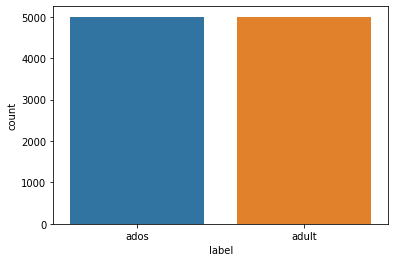

In [ ]:
sns.countplot(data['label'])

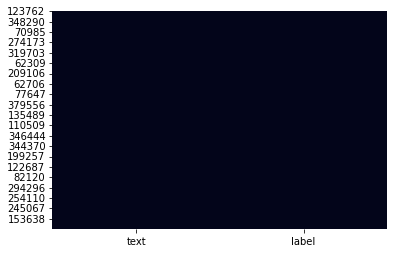

In [ ]:
sns.heatmap(data.isnull(), cbar=False)  #heatmap ou data.info nous permet de savoir si il y a des valeurs null. Aucune dans ce cas

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 123762 to 231957
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10000 non-null  object
 1   label   10000 non-null  object
dtypes: object(2)
memory usage: 492.4+ KB


In [ ]:
data.isnull().sum()  #Meme chose pour verifier s il y a des valeurs null

text     0
label    0
dtype: int64

In [ ]:
#SI on veut savoir les mots qui reviennent souvent dans les textes dont le label est ados 

In [ ]:
phrase_ados = data[['text'] and data['label']=='ados']#.tolist()

In [ ]:
phrase_ados.tail(5)

,text,label
12476,BOnjour.\n\nJe m'excuse à l'aavnce pour le lon...,ados
144702,Merci mais voilà sa me gêne vraiment c'est pas...,ados
139787,"Vu ton âge c'est pas impossible, mais vu que t...",ados
122296,Un mec attentionné et gentil,ados
99583,Soi fort.,ados


In [ ]:
phrase_ados =phrase_ados['text'].tolist()

In [ ]:
len(phrase_ados)

5000

In [ ]:
phrase_ados_uni = ' '.join(phrase_ados)  #Pour mettre les phrases de notre base dans une seule string

In [ ]:
len(phrase_ados_uni)  #Pour savoir la taille de notre string ou meiux le nbre de caracteres de notre base

1132036

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

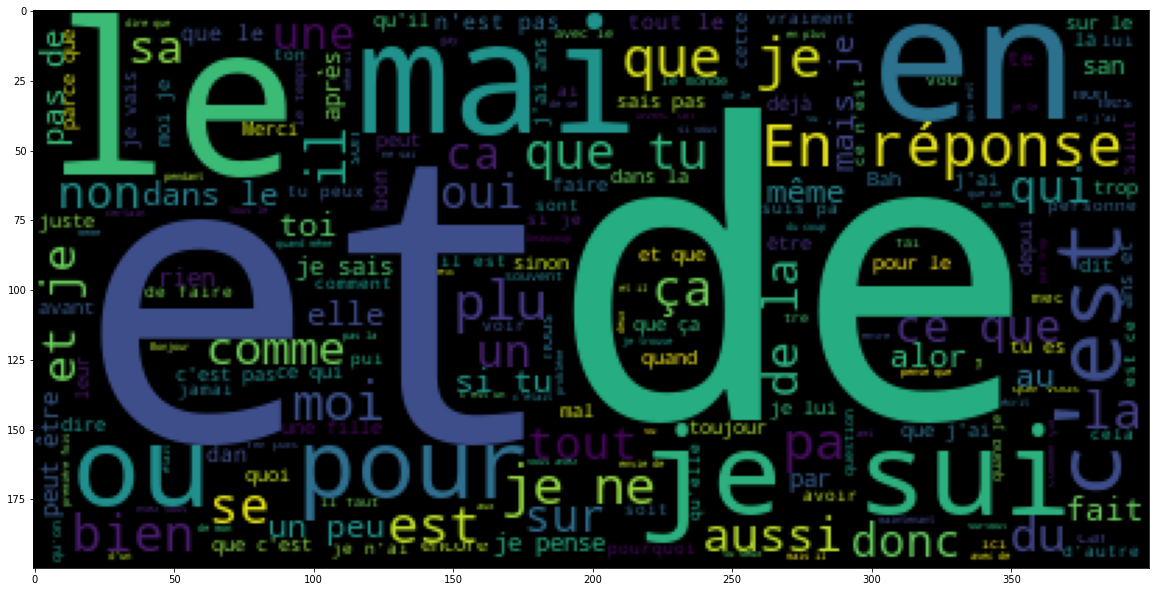

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(phrase_ados_uni))

In [ ]:
#On devrait faire le wordcloud apres avoir fait le nettoyage des textes pour éviter que les stopwords soient bcps representés

In [ ]:
#NETTOYAGE DES DONNÉES

In [ ]:
data

,text,label
123762,Merci..\nEs tu sur pour badoo ?,ados
14702,Connaissez-vous Rorqual ?,ados
319649,j'écris à cette heure car je n'arrive plus à t...,adult
20960,En réponse à mer97agj\nrépond en 1er à ton que...,ados
280768,peut être que ce sont des pleurs de joie....d'...,adult
...,...,...
144702,Merci mais voilà sa me gêne vraiment c'est pas...,ados
139787,"Vu ton âge c'est pas impossible, mais vu que t...",ados
122296,Un mec attentionné et gentil,ados
99583,Soi fort.,ados


In [ ]:
df1 = data

# Prepare Train Test Split

In [ ]:
reviews = df1['text'].values
sentiments = df1['label'].values

train_reviews = reviews[:7000]
train_sentiments = sentiments[:7000]

test_reviews = reviews[7000:]
test_sentiments = sentiments[7000:]

NETTOYAGE DE TEXTE ET NORMALIZATION

In [ ]:
!pip install contractions
!pip install textsearch
!pip install tqdm
import nltk
nltk.download('punkt')

     |████████████████████████████████| 284 kB 2.7 MB/s 
     |████████████████████████████████| 106 kB 47.3 MB/s 
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder

# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

In [ ]:
import contractions
from bs4 import BeautifulSoup
import numpy as np
import re
import tqdm
import unicodedata


def strip_html_tags(text):
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text

def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

def pre_process_corpus(docs):
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    doc = strip_html_tags(doc)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = doc.lower()
    doc = remove_accented_chars(doc)
    doc = contractions.fix(doc)
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()  
    norm_docs.append(doc)
  
  return norm_docs

In [ ]:
%%time

norm_train_reviews = pre_process_corpus(train_reviews)
norm_test_reviews = pre_process_corpus(test_reviews)

100%|██████████| 3000/3000 [00:00<00:00, 3902.26it/s]

CPU times: user 2.46 s, sys: 163 ms, total: 2.62 s
Wall time: 2.56 s


TOKENIZATION
To prepare text data for our deep learning model, we transform each review into a sequence. Every word in the review is mapped to an integer index and thus the sentence turns into a sequence of numbers.

To perform this transformation, keras provides the Tokenizer

In [ ]:
t = Tokenizer(oov_token='<UNK>')
# fit the tokenizer on the documents
t.fit_on_texts(norm_train_reviews)
t.word_index['<PAD>'] = 0

In [ ]:
max([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]), min([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]), t.word_index['<UNK>']

(('flache', 28369), ('<PAD>', 0), 1)

In [ ]:
train_sequences = t.texts_to_sequences(norm_train_reviews)

In [ ]:
test_sequences = t.texts_to_sequences(norm_test_reviews)

In [ ]:
print("Vocabulary size={}".format(len(t.word_index)))
print("Number of Documents={}".format(t.document_count))

Vocabulary size=28370
Number of Documents=7000


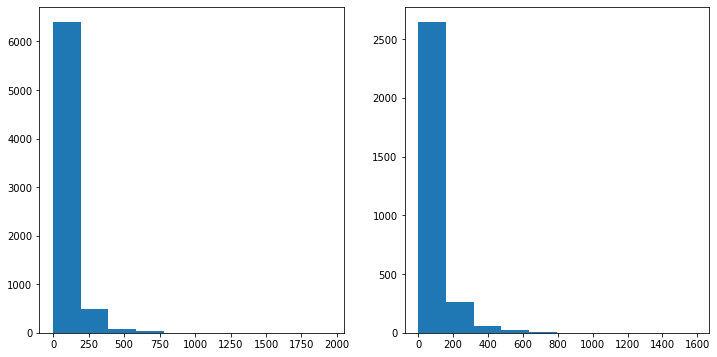

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

train_lens = [len(s) for s in train_sequences]
test_lens = [len(s) for s in test_sequences]

fig, ax = plt.subplots(1,2, figsize=(12, 6))
h1 = ax[0].hist(train_lens)
h2 = ax[1].hist(test_lens)

Sequence Normalization
Not all reviews are of same length. To handle this difference in length of reviews, we define a maximum length. For reviews which are smaller than this length, we pad them with zeros which longer ones are truncated

In [ ]:
MAX_SEQUENCE_LENGTH = 1000

In [ ]:
# pad dataset to a maximum review length in words
X_train = sequence.pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_test = sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_train.shape, X_test.shape

((7000, 1000), (3000, 1000))

Encoding Labels
The dataset contains labels of the form positive/negative. The following step encodes the labels using sklearn's LabelEncoder

In [ ]:
le = LabelEncoder()
num_classes=2 # Adult -> 1, Ados -> 0

In [ ]:
y_train = le.fit_transform(train_sentiments)
y_test = le.transform(test_sentiments)

In [ ]:
VOCAB_SIZE = len(t.word_index)

Prepare the Model
Since textual data is a sequence of words, we utilize 1D convolutions to scan through the sentences. The model first transforms each word into lower dimensional embedding/vector space followed by 1d convolutions and then passing the data through dense layers before the final layer for classification

In [ ]:
EMBED_SIZE = 200
EPOCHS=10
BATCH_SIZE=128

In [ ]:
# create the model
model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBED_SIZE, input_length=MAX_SEQUENCE_LENGTH))
model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 200)         5674000   
                                                                 
 conv1d (Conv1D)             (None, 1000, 128)         102528    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 500, 128)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 500, 64)           32832     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 250, 64)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 250, 32)           8

In [ ]:
# Fit the model
model.fit(X_train, y_train, 
          validation_split=0.1,
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          verbose=1)

Epoch 1/10
50/50 [==============================] - 14s 55ms/step - loss: 0.6016 - accuracy: 0.6884 - val_loss: 0.5312 - val_accuracy: 0.7257
Epoch 2/10
50/50 [==============================] - 2s 46ms/step - loss: 0.4019 - accuracy: 0.8229 - val_loss: 0.4418 - val_accuracy: 0.7957
Epoch 3/10
50/50 [==============================] - 2s 45ms/step - loss: 0.2107 - accuracy: 0.9210 - val_loss: 0.5272 - val_accuracy: 0.7957
Epoch 4/10
50/50 [==============================] - 2s 45ms/step - loss: 0.0968 - accuracy: 0.9668 - val_loss: 0.7176 - val_accuracy: 0.8014
Epoch 5/10
50/50 [==============================] - 2s 46ms/step - loss: 0.0421 - accuracy: 0.9862 - val_loss: 1.0076 - val_accuracy: 0.7857
Epoch 6/10
50/50 [==============================] - 2s 46ms/step - loss: 0.0269 - accuracy: 0.9900 - val_loss: 1.3964 - val_accuracy: 0.7571
Epoch 7/10
50/50 [==============================] - 2s 45ms/step - loss: 0.0362 - accuracy: 0.9870 - val_loss: 1.2159 - val_accuracy: 0.7857
Epoch 8/10
5

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

94/94 [==============================] - 1s 7ms/step - loss: 1.6602 - accuracy: 0.7813
Accuracy: 78.13%


In [ ]:
predictions = model.predict(X_test).ravel()
predictions[:10]

array([1.0000000e+00, 3.4808920e-05, 9.9999988e-01, 9.9048549e-01,
       9.9999857e-01, 9.9465150e-01, 2.5529235e-03, 4.3855296e-03,
       9.9999952e-01, 3.1348413e-06], dtype=float32)

In [ ]:
predictions = ['adult' if item == 1 else 'ados' for item in predictions]
predictions[:10]

['adult',
 'ados',
 'ados',
 'ados',
 'ados',
 'ados',
 'ados',
 'ados',
 'ados',
 'ados']

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

labels = ['adult', 'ados']
print(classification_report(test_sentiments, predictions))
pd.DataFrame(confusion_matrix(test_sentiments, predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

        ados       0.62      0.98      0.76      1488
       adult       0.95      0.42      0.58      1512

    accuracy                           0.70      3000
   macro avg       0.79      0.70      0.67      3000
weighted avg       0.79      0.70      0.67      3000



,adult,ados
adult,1458,30
ados,884,628


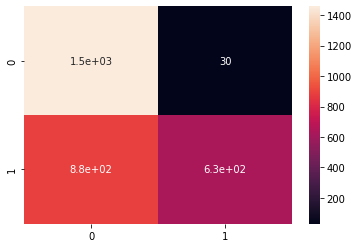

In [ ]:
sns.heatmap(confusion_matrix(test_sentiments, predictions), annot=True)